Testing for organization of the library/classes of featurizing

In [178]:
import itertools
import numpy as np
import pandas as pd
import MDAnalysis as mda
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings

Import our unique modules

In [179]:
import featurize.featurize as feat
import featurize.caller as caller

In [180]:
traj_list = ['traj_dat/w1.xtc', 'traj_dat/w2.xtc', 'traj_dat/w3.xtc']

Loading the files and whatnot

In [181]:
def load_trajectories(traj_files, top_file):
    """Load molecular dynamics simulation trajectories."""
    traj = md.load(traj_files, top=top_file)
    return traj

In [182]:
def extract_features(traj_files, top_file):
    """Extract features from trajectories."""
    tr = top_file
    feat_ = caller.feature(tr)
    reader = pyemma.coordinates.source(traj_files, features=feat_)
    return reader

In [183]:
# Load molecular dynamics simulation trajectories

top_file = 'traj_dat/10.gro'
traj = load_trajectories(traj_list, top_file)

# Extract features from trajectories
reader = extract_features(traj_list, top_file)

In [184]:
traj_list = ['traj_dat/w1.xtc','traj_dat/w2.xtc','traj_dat/w3.xtc']


In [185]:
n_list = []
ls = []
for item in traj_list:
    print(item)
    n_list.append(md.load(item, top='traj_dat/10.gro'))
    u_ = mda.Universe('traj_dat/10.gro', item)
    ls.append(u_)


traj_dat/w1.xtc
traj_dat/w2.xtc
traj_dat/w3.xtc


In [186]:
ls

[<Universe with 234791 atoms>,
 <Universe with 234791 atoms>,
 <Universe with 234791 atoms>]

MDAnalysis contacts

In [187]:
universes = [mda.Universe('traj_dat/10.gro', traj) for traj in traj_list]

# Define lipid and protein selections
lipid_selection = '(resname POPC DOPE SAPI)'
prot_selections = [f"(resid {i}) and (not backbone)" for i in range(1, 11)]

# Initialize contact analysis class
contact_analysis = feat.cont()

# Run analysis for each trajectory and each protein selection
results = []
for universe in universes:
    for prot_sel in prot_selections:
        result = contact_analysis.contacts_MDA(universe, universe.select_atoms(prot_sel), universe.select_atoms(lipid_selection))
        results.append(result)

In [188]:
prot_selections

['(resid 1) and (not backbone)',
 '(resid 2) and (not backbone)',
 '(resid 3) and (not backbone)',
 '(resid 4) and (not backbone)',
 '(resid 5) and (not backbone)',
 '(resid 6) and (not backbone)',
 '(resid 7) and (not backbone)',
 '(resid 8) and (not backbone)',
 '(resid 9) and (not backbone)',
 '(resid 10) and (not backbone)']

In [189]:

from pyemma.coordinates.data.featurization.misc import GroupCOMFeature
c1 = GroupCOMFeature(feat_.topology, [list(range(1,367))])

In [190]:
type(c1)

pyemma.coordinates.data.featurization.misc.GroupCOMFeature

mdtraj distance calculation

In [191]:
tr = 'traj_dat/10.gro'
feat_ = caller.feature(tr)

from pyemma.coordinates.data.featurization.misc import GroupCOMFeature
c1 = GroupCOMFeature(feat_.topology, [list(range(1,367))])
c1_ = GroupCOMFeature(feat_.topology, [list(range(628,33617))])
c2 = GroupCOMFeature(feat_.topology, [list(range(1,2))])
c3 = GroupCOMFeature(feat_.topology, [list(range(626,627))])
c4 = GroupCOMFeature(feat_.topology, [list(range(128,129))])
c5 = GroupCOMFeature(feat_.topology, [list(range(228,229))])
c6 = GroupCOMFeature(feat_.topology, [list(range(328,339))])
c7 = GroupCOMFeature(feat_.topology, [list(range(428,429))])
c8 = GroupCOMFeature(feat_.topology, [list(range(528,529))])
c9 = GroupCOMFeature(feat_.topology, [list(range(600,601))])
c10 = GroupCOMFeature(feat_.topology, [list(range(28,29))])

group_features_dict = {
    'c1': c1,
    'c2': c2,
    'c3': c3,
    'c4': c4,
    'c5': c5,
    'c6': c6,
    'c7': c7,
    'c8': c8,
    'c9': c9,
    'c10': c10,
    }

d_bil = feat.dist()

ls2 = []
def run_func2():
    for traj in n_list:
        for name, feature in group_features_dict.items():
            print('Working on feature:', name)
            ls2.append(d_bil.dist_bil(traj, c1_, feature))
    return ls2

l2 = run_func2()






Working on feature: c1
Working on feature: c2
Working on feature: c3
Working on feature: c4
Working on feature: c5
Working on feature: c6
Working on feature: c7
Working on feature: c8
Working on feature: c9
Working on feature: c10
Working on feature: c1
Working on feature: c2
Working on feature: c3
Working on feature: c4
Working on feature: c5
Working on feature: c6
Working on feature: c7
Working on feature: c8
Working on feature: c9
Working on feature: c10
Working on feature: c1
Working on feature: c2
Working on feature: c3
Working on feature: c4
Working on feature: c5
Working on feature: c6
Working on feature: c7
Working on feature: c8
Working on feature: c9
Working on feature: c10


In [34]:
d_bil = feat.dist()

In [50]:
a =[list(range(1,367))]
bil =  [list(range(628,33617))]
b =  [list(range(1,2))]
c = [list(range(626,627))]
d = [list(range(128,129))]
e = [list(range(228,229))]
f = [list(range(328,339))]
g =  [list(range(428,429))]
h = [list(range(528,529))]
i = [list(range(600,601))]
j =  [list(range(28,29))]

In [52]:
def calulate_dists(top_file, bil, a ,b ,c,d,e,f,g,h,i,j):
    bil = GroupCOMFeature(top_file.topology,bil)
    a = GroupCOMFeature(top_file.topology, a)
    
    b = GroupCOMFeature(top_file.topology, b)
    c = GroupCOMFeature(top_file.topology, c)
    d = GroupCOMFeature(top_file.topology, d)
    e = GroupCOMFeature(top_file.topology, e)
    f = GroupCOMFeature(top_file.topology, f)
    g = GroupCOMFeature(top_file.topology, g)
    h = GroupCOMFeature(top_file.topology, h)
    i = GroupCOMFeature(top_file.topology, i)
    j = GroupCOMFeature(top_file.topology, j)
#     k = GroupCOMFeature(top_file.topology, k)

    group_features_dict = {'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'f': f, 'g': g, 'h': h, 'i': i, 'j': j}
    d_bil = feat.dist()
    ls2 = []
    for traj in n_list:
        for name, feature in group_features_dict.items():
            ls2.append(d_bil.dist_bil(traj,bil, feature))
    return ls2


In [93]:
test = calulate_dists(feat_,bil,a ,b ,c,d,e,f,g,h,i,j)

In [94]:
np.shape(test)

/home/jaybraun/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(30,)

In [160]:

# splits breaks it into the correct amount of trajectories

splits2 = np.array_split(results, 3)
splits1 = np.array_split(l2, 3)

# here we are pushing to have the whole thing reshaped

processor1 = caller.ChunkProcessor(splits1, 10)
processor2 = caller.ChunkProcessor(splits2, 10)
# processor_ = caller.ChunkProcessor()

m1 = processor1.fubar(splits1, 10)
m2 = processor2.fubar(splits2, 10)
# m_ = processor2.fubar()

/home/jaybraun/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [161]:
combined_array = np.hstack((m1, m2))
list_ = combined_array.tolist()

In [162]:
caller.ReturnInputs

featurize.caller.ReturnInputs

In [81]:
def reshaping(inp1,inp2, traj_chunk, feat_len1, feat_len2):
    splits1 = np.array_split(inp1, traj_chunk)
    splits2 = np.array_split(inp2, traj_chunk)
    processor_a = caller.ChunkProcessor(splits1, feat_len1)
    processor_b = caller.ChunkProcessor(splits2, feat_len2)
    m1 = processor_a.fubar(splits1,feat_len1)
    m2 = processor_b.fubar(splits2,feat_len2)
    compbined_array = np.concatenate((m1,m2), axis=1)
    list_ = compbined_array.tolist()
    processor1 = caller.ReturnInputs()
    processor2 = caller.ReturnInputs()
    processor3 = caller.ReturnInputs()
    in1 = processor1.return_inputs(list_,0,20)
    in2 = processor2.return_inputs(list_,1,20)
    in3 = processor3.return_inputs(list_,2,20)
    conts = in1+in2+in3
    print(conts,'conts')
    return conts


In [84]:
test = reshaping(ls2,results,3,10,10)

(2, 1, 10, 11)
(2, 1, 10, 5)
(2, 1, 10, 11)
[array([[  0.14719187,   0.16049286,   0.14558569,   0.14968251,
          0.13328343,   0.16076352,   0.15808258,   0.13984436,
          0.13939599,   0.1503803 ,  19.        ,   0.        ,
          0.        ,  13.        ,  25.        ,   0.        ,
          0.        ,   9.        ,  20.        ,   0.        ],
       [  0.14327949,   0.16512864,   0.16318843,   0.1417056 ,
          0.12693762,   0.16058209,   0.15637501,   0.16158001,
          0.15040115,   0.15354182,  46.        ,  16.        ,
          0.        ,  19.        ,  17.        ,   0.        ,
          0.        ,  21.        ,  22.        ,   0.        ],
       [  0.14262521,   0.16133862,   0.15498725,   0.14204257,
          0.12948095,   0.16760605,   0.15064455,   0.15827436,
          0.13548038,   0.14673207,  48.        ,  10.        ,
          0.        ,   5.        ,   0.        ,   0.        ,
          0.        ,  10.        ,   0.        ,   0.   

/home/jaybraun/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [168]:
np.shape(test[10])

(5, 1)

In [169]:
processor1 = caller.ReturnInputs()
processor2 = caller.ReturnInputs()
processor3 = caller.ReturnInputs()

in1 = processor1.return_inputs(list_,0,20)
in2 = processor2.return_inputs(list_,1,20)
in3 = processor3.return_inputs(list_,2,20)

(2, 1, 10, 11)
(2, 1, 10, 5)
(2, 1, 10, 11)


In [170]:
print(np.shape(in1))
print(np.shape(in2))
print(np.shape(in3))

(1, 11, 20)
(1, 5, 20)
(1, 11, 20)


In [171]:
conts=in1+in2+in3

In [172]:
dims = [(11, 20), (5, 20), (11, 20)]

arrs = [np.array(conts[i]).reshape(*dims[i]) for i in range(len(conts))]

In [193]:
np.shape(arrs[0])

(11, 20)

In [174]:
j1 = np.array(in1)
j2 = np.array(in2)
j3 = np.array(in3)
resh1 = j1.reshape(11,20)
resh2 = j2.reshape(5,20)
resh3 = j3.reshape(11,20)

In [175]:
arrls = [resh1,resh2,resh3]

Dev for 2/10/23


In [143]:
dims = [(11, 20), (5, 20), (11, 20)]
def save_reader(inputs, name_prefix,dims=dims):
    

    arrs = [np.array(conts[i]).reshape(*dims[i]) for i in range(len(conts))]
 
    for i in range(len(inputs)):
        with open(f'{name_prefix}_{i:03d}.npy','wb') as handle:
            np.save(handle, inputs[i])

In [194]:
arrs[1]

array([[ 0.14755869,  0.1653954 ,  0.14589773,  0.14818948,  0.13267673,
         0.16154696,  0.15910606,  0.14382039,  0.14236667,  0.15443738,
        29.        ,  4.        ,  0.        , 11.        , 11.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.11456558,  0.11322872,  0.09312131,  0.11624283,  0.11302398,
         0.11857847,  0.11061114,  0.10263063,  0.10019356,  0.11868477,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.11933343,  0.1116866 ,  0.09724197,  0.11963689,  0.13334   ,
         0.11694056,  0.10323513,  0.10491389,  0.09577969,  0.11273163,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.08619591,  0.0904365 ,  0.09784274,  0.08541546,  0.08495829,
         0.08257832,  0.0900051 ,  0.09417542,  

In [138]:
arrls

[array([[ 19.        ,   0.        ,   0.        ,  13.        ,
          25.        ,   0.        ,   0.        ,   9.        ,
          20.        ,   0.        ,   0.14719187,   0.16049286,
           0.14558569,   0.14968251,   0.13328343,   0.16076352,
           0.15808258,   0.13984436,   0.13939599,   0.1503803 ],
        [ 46.        ,  16.        ,   0.        ,  19.        ,
          17.        ,   0.        ,   0.        ,  21.        ,
          22.        ,   0.        ,   0.14327949,   0.16512864,
           0.16318843,   0.1417056 ,   0.12693762,   0.16058209,
           0.15637501,   0.16158001,   0.15040115,   0.15354182],
        [ 48.        ,  10.        ,   0.        ,   5.        ,
           0.        ,   0.        ,   0.        ,  10.        ,
           0.        ,   0.        ,   0.14262521,   0.16133862,
           0.15498725,   0.14204257,   0.12948095,   0.16760605,
           0.15064455,   0.15827436,   0.13548038,   0.14673207],
        [ 26.        ,

In [142]:
np.shape(arrls[2])

(11, 20)

In [64]:
type(conts)

list

In [176]:
tica_dev = pyemma.coordinates.tica(conts,lag=1,dim=4)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                                                                      | 0/3 [00:00…

getting output of TICA:   0%|                                                                     | 0/3 [00:00…

In [177]:
tica_out

[array([[ 0.0842592 , -0.9113399 , -0.21832518,  0.60538286],
        [ 0.56611514, -0.2350031 , -0.4775456 , -0.98159343],
        [ 0.7693936 , -0.650998  ,  0.40139922,  1.3266892 ],
        [ 1.2582046 , -0.5909134 , -0.6352818 , -1.5671096 ],
        [ 1.6236862 ,  0.10014849,  0.7197688 ,  1.3845484 ],
        [ 1.7745854 ,  0.36247742, -0.65467995, -0.96699214],
        [ 1.630356  ,  0.41655084,  1.2664399 ,  0.46805638],
        [ 1.2520213 ,  0.4210912 , -1.5707122 ,  0.10635445],
        [ 0.72519624,  0.49529046,  1.6819946 , -0.57092845],
        [ 0.38042444,  0.7838772 , -1.4734498 ,  1.0119671 ],
        [ 0.1983581 ,  0.8920622 ,  0.8479856 , -0.84636384]],
       dtype=float32),
 array([[-0.84278387, -0.84096086,  0.6935613 ,  1.7872325 ],
        [-1.0519991 , -1.0535733 , -0.35857067, -0.973208  ],
        [-0.84420884, -1.2844311 , -0.34263903,  0.609625  ],
        [-0.64192045, -1.268887  ,  0.87302166, -0.08894872],
        [-0.38027072, -1.113438  , -0.611914  

In [146]:
tica_out

[array([[ 0.08425922, -0.9113399 , -0.21832485,  0.6053834 ],
        [ 0.56611514, -0.23500308, -0.47754604, -0.9815936 ],
        [ 0.7693936 , -0.650998  ,  0.40139985,  1.3266894 ],
        [ 1.2582046 , -0.5909134 , -0.63528246, -1.5671095 ],
        [ 1.6236861 ,  0.10014851,  0.71976936,  1.3845481 ],
        [ 1.7745854 ,  0.36247745, -0.65468025, -0.9669918 ],
        [ 1.630356  ,  0.41655087,  1.26644   ,  0.46805555],
        [ 1.2520213 ,  0.42109123, -1.5707121 ,  0.10635545],
        [ 0.72519624,  0.49529046,  1.6819942 , -0.57092935],
        [ 0.3804244 ,  0.78387713, -1.4734495 ,  1.0119675 ],
        [ 0.1983581 ,  0.8920621 ,  0.8479854 , -0.8463639 ]],
       dtype=float32),
 array([[-0.84278387, -0.84096086,  0.69356203,  1.7872323 ],
        [-1.0519991 , -1.0535733 , -0.35857114, -0.9732082 ],
        [-0.84420884, -1.2844311 , -0.34263876,  0.6096253 ],
        [-0.64192045, -1.268887  ,  0.8730217 , -0.08894879],
        [-0.38027072, -1.113438  , -0.61191463

In [155]:
ls = caller.make_arr(tica_concatenated)

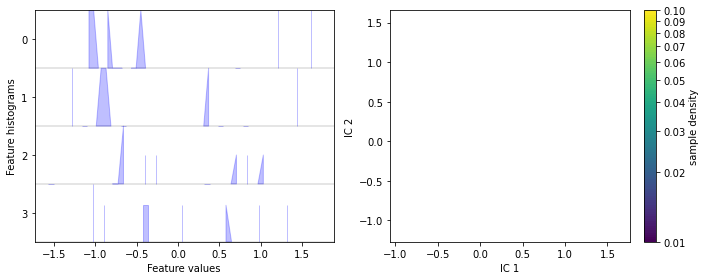

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica2.png')

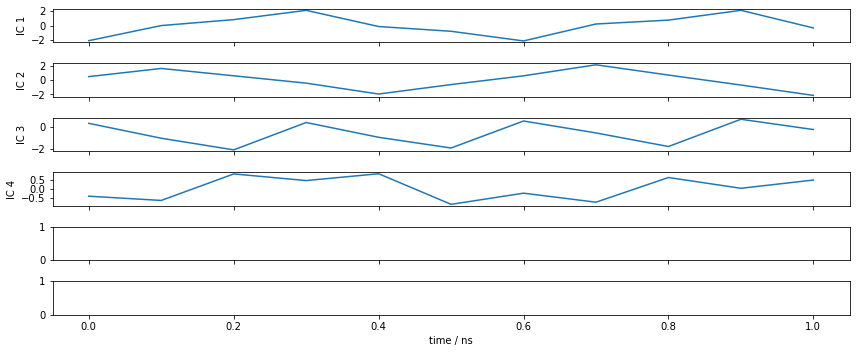

In [34]:
fig, axes = plt.subplots(6, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_out[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_out[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()
# plt.savefig('ics2.png')

In [71]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_out, k=20, max_iter=100, stride=1, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)


initialize kmeans++ centers:   0%|                                                                            …

kmeans iterations:   0%|                                                                                      …

getting output of KmeansClustering:   0%|                                                                     …

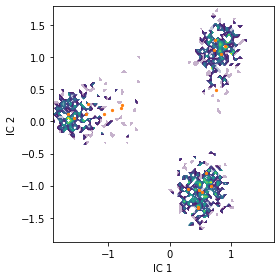

In [72]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

estimating BayesianMSM:   0%|                                                                                 …

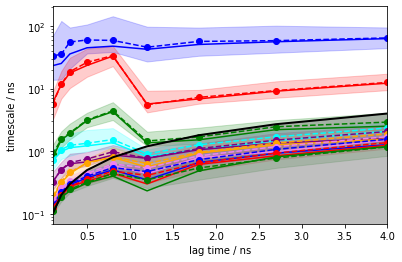

In [73]:
its = pyemma.msm.its(cluster.dtrajs, lags=40, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);

In [80]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=6, dt_traj='0.2 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[40]: compute stat. inefficiencies:   0%|                       …

pyemma.msm.estimators.bayesian_msm.BayesianMSM[40]: Sampling MSMs:   0%|                                      …

fraction of states used = 1.00
fraction of counts used = 1.00


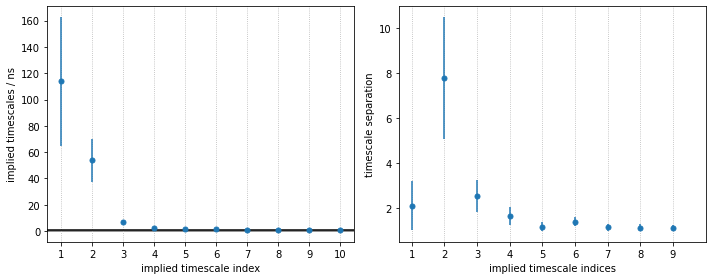

In [81]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
# axes[1].set_xticklabels(
#     ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
#     rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
# plt.savefig('spectral2.png')

estimating BayesianMSM:   0%|                                                                                 …

/home/jaybraun/miniconda3/lib/python3.9/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 12 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


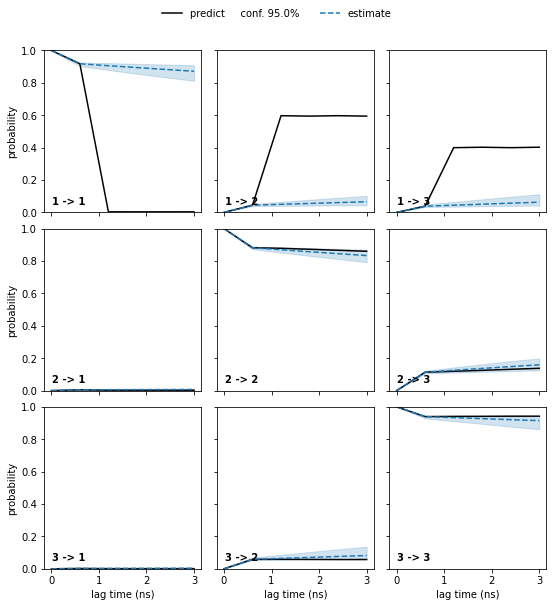

In [82]:
nstates = 3
cktest = msm.cktest(nstates, mlags=6)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');
